# Capstone 2 - Noods

https://www.kaggle.com/datasets/residentmario/ramen-ratings?resource=download

In [1]:
import pandas as pd
import numpy as np
ramen_data = pd.read_csv('ramen-ratings.csv')
ramen_data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


## Hypthesis - Sam Yang noodles will be among the top 10 most highly rated noodle brands.

In [49]:
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors='coerce')

# Drop rows with NaN values in the 'Stars' column
ramen_data = ramen_data.dropna(subset=['Stars'])

# Use groupby to find the count and mean of stars by brand
brand_stats = ramen_data.groupby('Brand').agg({'Stars': ['count', 'mean']}).reset_index().round(2)

# Rename the columns for clarity
brand_stats.columns = ['Brand', 'Review Count', 'Average Stars']
brand_stats_filtered = brand_stats[brand_stats['Review Count']> 10].sort_values('Review Count', ascending=False).reset_index(drop = True)


brand_stats_filtered.sort_values('Average Stars', ascending=False).reset_index(drop = True).head(10)


,Brand,Review Count,Average Stars
0,MyKuali,24,4.95
1,Yamachan,11,4.57
2,Vit's,13,4.21
3,KOKA,25,4.21
4,ABC,12,4.21
5,Takamori Kosan,14,4.16
6,Mi Sedaap,12,4.15
7,Deshome,13,4.13
8,Indomie,53,4.07
9,Samyang Foods,51,4.07


In [50]:
brand_stats_filtered = brand_stats[brand_stats['Review Count']> 50].sort_values('Review Count', ascending=False).reset_index(drop = True).round(2)


brand_stats_filtered.sort_values('Average Stars', ascending=False).reset_index(drop = True).head(10)

,Brand,Review Count,Average Stars
0,Indomie,53,4.07
1,Samyang Foods,51,4.07
2,Paldo,66,4.02
3,Nongshim,98,4.00
4,Nissin,381,3.92
5,Myojo,63,3.80
6,Mama,71,3.63
7,Maruchan,76,3.55


## Hypothesis 2: Southeast Asian countries will have the most variety  of ramen.

In [41]:
country_stats = ramen_data.groupby('Country').agg({'Stars': ['count', 'mean']}).reset_index()
country_stats

country_stats.columns = ['Country', 'Review Count', 'Average Stars']
country_stats
country_stats_sorted = country_stats.sort_values('Review Count', ascending = False).reset_index(drop = True)
country_stats_sorted

,Country,Review Count,Average Stars
0,Japan,352,3.981605
1,USA,323,3.457043
2,South Korea,307,3.790554
3,Taiwan,224,3.665402
4,Thailand,191,3.384817
5,China,169,3.421893
6,Malaysia,155,4.154194
7,Hong Kong,137,3.801825
8,Indonesia,126,4.067460
9,Singapore,109,4.126147


In [44]:
seasia = ['Cambodia', 'Indonesia','Laos','Malaysia', 'Sarawak', 'Myanmar', 'Thailand','Philippines', 'Singapore', 'Brunei','Vietnam', 'East Timor']
sasia = ['Bangladesh','Bhutan','India', 'Pakistan', 'Nepal', 'Sri Lanka']
easia = ['China','Japan','South Korea','Hong Kong', 'Mongolia', 'Macao', 'Taiwan']
namerica = ['USA','Mexico','Canada', 'United States']
europe = ['UK', 'Netherlands', 'Holland', 'Germany', 'Poland', 'Italy', 'Russia', 'France', 'Spain', 'Hungary', 'Estonia']
scandinavia = ['Sweden','Denmark','Norway','Finland']
oceania = ['Australia','New Zealand','Fiji']
samerica = ['Colombia','Brazil']
middleeast = ['Dubai']
africa = ['Ghana','Nigeria']

country_to_region = {}

for country in seasia:
    country_to_region[country] = 'SE Asia'

for country in sasia:
    country_to_region[country] = 'S Asia'

for country in easia:
    country_to_region[country] = 'E Asia'

for country in namerica:
    country_to_region[country] = 'N America'

for country in europe:
    country_to_region[country] = 'Europe'

for country in scandinavia:
    country_to_region[country] = 'Scandinavia'

for country in oceania:
    country_to_region[country] = 'Oceania'

for country in samerica:
    country_to_region[country] = 'S America'

for country in middleeast:
    country_to_region[country] = 'Middle East'

for country in africa:
    country_to_region[country] = 'Africa'

ramen_data['Region'] = ramen_data['Country'].map(country_to_region)




,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Region
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,E Asia
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN,E Asia
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,N America
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,E Asia
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,S Asia
...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN,SE Asia
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN,SE Asia
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN,SE Asia
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN,SE Asia


In [123]:
ramen_by_region = ramen_data.groupby('Region').agg({'Stars': ['count', 'mean']}).reset_index().round(2)
ramen_by_region.columns = ['Region', 'Varieties', 'Average Stars']
ramen_by_region_sorted = ramen_by_region.sort_values('Varieties', ascending = False).reset_index(drop = True)
ramen_by_region_sorted



,Region,Varieties,Average Stars
0,E Asia,1189,3.77
1,SE Asia,758,3.75
2,N America,390,3.35
3,Europe,130,3.16
4,S Asia,61,3.41
5,Oceania,26,3.25
6,S America,11,3.77
7,Scandinavia,6,3.42
8,Africa,3,2.83
9,Middle East,3,3.58


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart
wedges, _, = ax.pie(ramen_by_region_sorted['Varieties'], startangle = 360, labeldistance=1.05, labels=None)
ax.legend(wedges, ramen_by_region_sorted['Region'], title='Region', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Varieties of Ramen by Region', fontname = 'Microsoft Sans Serif')


plt.show()

## Hypothesis 3: The most highly rated style of ramen will be Pack.

In [105]:
ramen_style = ramen_data.groupby('Style').agg({'Stars': ['count', 'mean']}).reset_index().round(2)
ramen_style.columns = ['Style', 'Count','Average Stars']
ramen_style.sort_values('Average Stars', ascending = False).reset_index(drop = True)

,Style,Count,Average Stars
0,Bar,1,5.00
1,Box,6,4.29
2,Pack,1528,3.70
3,Bowl,481,3.67
4,Tray,108,3.55
5,Can,1,3.50
6,Cup,450,3.50


## Filtering out the Top Ten stuff.. 

In [124]:
top_ten_data = ramen_data[(ramen_data['Top Ten'].notna()) & (ramen_data['Top Ten'] != "\n")]
top_ten_data.reset_index(drop = True)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Region
0,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10,SE Asia
1,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1,SE Asia
2,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8,SE Asia
3,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5,SE Asia
4,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9,E Asia
5,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7,E Asia
6,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10,E Asia
7,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7,SE Asia
8,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4,SE Asia
9,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9,E Asia


In [156]:
top_ten_data[['Year', 'Rank']] = top_ten_data['Top Ten'].str.extract(r'(\d{4})\s*#(\d+)')

#top_ten_data = top_ten_data.drop(['Year', 'Rank'], axis = 1)
#top_ten_data
top_ten_data['Rank'] = pd.to_numeric(top_ten_data['Rank'], errors='coerce')
top_ten_data['Year'] = pd.to_numeric(top_ten_data['Year'], errors='coerce')
# top_ten_data_2012= top_ten_data[top_ten_data['Year'] == '2012'].sort_values('Rank', ascending = True).reset_index(drop = True)
# top_ten_data_2012
def filter_by_year(df, year):
    filtered_data = df[df['Year'] == year]
    return filtered_data.sort_values('Rank', ascending = True).reset_index(drop = True)

top_2012 = filter_by_year(top_ten_data, 2012)
top_2013 = filter_by_year(top_ten_data, 2013)
top_2014 = filter_by_year(top_ten_data, 2014)
top_2015 = filter_by_year(top_ten_data, 2015)
top_2016 = filter_by_year(top_ten_data, 2016)

top_2016


,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Region,Year,Rank
0,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1,SE Asia,2016,1
1,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.0,2016 #5,SE Asia,2016,5
2,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.0,2016 #7,E Asia,2016,7
3,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,2016 #8,SE Asia,2016,8
4,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.0,2016 #9,E Asia,2016,9
5,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,2016 #10,SE Asia,2016,10


In [161]:
top_ten_country = top_ten_data.groupby('Country').size().reset_index(name ='Count').sort_values('Count', ascending = False)
top_ten_country

,Country,Count
6,Singapore,7
3,Japan,6
4,Malaysia,6
7,South Korea,5
2,Indonesia,4
9,Thailand,3
8,Taiwan,2
0,China,1
1,Hong Kong,1
5,Myanmar,1


In [169]:
top_ten_data['Region'] = top_ten_data['Country'].map(country_to_region)
top_ten_region = top_ten_data.groupby('Region').size().reset_index(name ='Count').sort_values('Count', ascending = False)
top_ten_region

,Region,Count
2,SE Asia,21
0,E Asia,15
1,N America,1


In [162]:
top_ten_brand = top_ten_data.groupby('Brand').size().reset_index(name ='Count').sort_values('Count', ascending = False)
top_ten_brand

,Brand,Count
16,Prima Taste,5
10,MyKuali,3
13,Nongshim,3
3,Indomie,3
6,Mama,3
18,Sapporo Ichiban,2
7,Mamee,2
14,Paldo,2
11,Myojo,2
19,Tseng Noodles,1


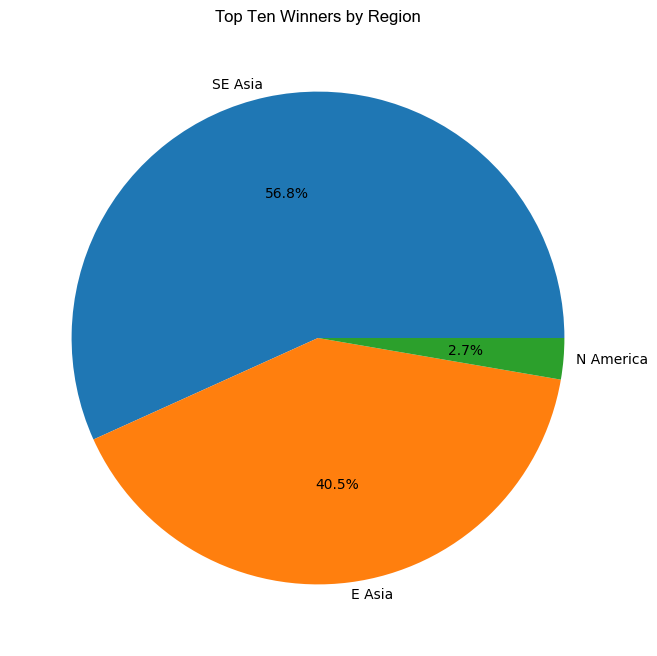

In [173]:


plt.figure(figsize=(8, 8))
plt.pie(top_ten_region['Count'], startangle = 360, labeldistance=1.05, autopct='%1.1f%%',labels=top_ten_region['Region'])
plt.title('Top Ten Winners by Region', fontname = 'Microsoft Sans Serif')


plt.show()

## filtering data

In [174]:
filtered_data = ramen_data[ramen_data['Style'] == "Bar"]

filtered_data.reset_index(drop = True)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Region
0,1155,Komforte Chockolates,Savory Ramen,Bar,USA,5.0,NaN,N America
